In [1]:
from pyspark.sql import SparkSession
from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark.sql import functions as f
import pandas as pd
import numpy as np
from pyspark_dist_explore import hist
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
spark =  SparkSession.builder.config('spark.driver.memory', '10g').appName('spark').getOrCreate()

In [3]:
df_client_stats = spark.read.option("header","true").csv("client_stats_sample_0225part1.csv")
df_client_stats.show(3)

+---+--------------------+--------------------+---------+--------------------+-------+-----------+-------------+-------------+------------+--------------+--------------+-------------------+-----------------+-----------------+-----------+---------+---------------+---------------+-----------+-------------------+----------+-------------+---------+---------+------+------+----------+-------+--------------+
|_c0|         location_id|          client_mac|freq_band|         mac_address|country|vendor_name|rssi_percs_25|rssi_percs_75|         isp|total_bytes_tx|total_bytes_rx|                 ts|txWeightedPhyRate|rxWeightedPhyRate|     idtype|is_static|weighted_prr_tx|weighted_prr_rx|num_samples|is_connected_to_pod|pod_serial|control_group|bandCap2G|bandCap5G|maxMcs|maxNss|maxChWidth|phyMode|isBTMSupported|
+---+--------------------+--------------------+---------+--------------------+-------+-----------+-------------+-------------+------------+--------------+--------------+-------------------+-

In [4]:
df_client_stats.columns

['_c0',
 'location_id',
 'client_mac',
 'freq_band',
 'mac_address',
 'country',
 'vendor_name',
 'rssi_percs_25',
 'rssi_percs_75',
 'isp',
 'total_bytes_tx',
 'total_bytes_rx',
 'ts',
 'txWeightedPhyRate',
 'rxWeightedPhyRate',
 'idtype',
 'is_static',
 'weighted_prr_tx',
 'weighted_prr_rx',
 'num_samples',
 'is_connected_to_pod',
 'pod_serial',
 'control_group',
 'bandCap2G',
 'bandCap5G',
 'maxMcs',
 'maxNss',
 'maxChWidth',
 'phyMode',
 'isBTMSupported']

In [5]:
df_client_stats_selected = df_client_stats.select('rssi_percs_25','txWeightedPhyRate','rxWeightedPhyRate')

In [6]:
df_client_stats_selected.show(3)

+-------------+-----------------+-----------------+
|rssi_percs_25|txWeightedPhyRate|rxWeightedPhyRate|
+-------------+-----------------+-----------------+
|        -64.0|         88.45363|         85.17462|
|        -64.0|        125.81183|       116.114296|
|        -64.0|       113.710815|        97.602585|
+-------------+-----------------+-----------------+
only showing top 3 rows



# Look at the RSSI levels (rssi_percs_25) and look at the spread of Tx and Rx weighted Phy Rate

In [7]:
df_client_stats_selected.summary().show()

+-------+------------------+------------------+-----------------+
|summary|     rssi_percs_25| txWeightedPhyRate|rxWeightedPhyRate|
+-------+------------------+------------------+-----------------+
|  count|            349633|            337658|           345314|
|   mean|-58.36171070808533|285.42546087736895|263.9162788417009|
| stddev|12.798838794940592| 268.8145817774094|269.5110488284659|
|    min|             -10.0|               0.0|              0.0|
|    25%|             -67.0|          72.22221|        62.591774|
|    50%|             -59.0|         144.44444|        142.53798|
|    75%|             -51.0|         432.14774|         411.1029|
|    max|              32.0|          999.9521|        999.54034|
+-------+------------------+------------------+-----------------+



In [8]:
df_client_stats_selected.printSchema()

root
 |-- rssi_percs_25: string (nullable = true)
 |-- txWeightedPhyRate: string (nullable = true)
 |-- rxWeightedPhyRate: string (nullable = true)



In [9]:
### convert the datatype of fields 'rssi_percs_25','txWeightedPhyRate','rxWeightedPhyRate' to int/float #####

df_client_stats_selected_datatype = df_client_stats_selected\
                                    .withColumn("rssi_percs_25",df_client_stats_selected["rssi_percs_25"].cast('int'))\
                                    .withColumn("txWeightedPhyRate",df_client_stats_selected["txWeightedPhyRate"].cast('float'))\
                                    .withColumn("rxWeightedPhyRate",df_client_stats_selected["rxWeightedPhyRate"].cast('float'))

In [10]:
df_client_stats_selected_datatype.printSchema()

root
 |-- rssi_percs_25: integer (nullable = true)
 |-- txWeightedPhyRate: float (nullable = true)
 |-- rxWeightedPhyRate: float (nullable = true)



(array([8.3200e+02, 3.6630e+03, 2.1868e+04, 3.9891e+04, 6.1639e+04,
        7.7794e+04, 6.0650e+04, 3.7660e+04, 2.2495e+04, 1.1107e+04,
        6.3080e+03, 4.3510e+03, 1.1100e+03, 2.2900e+02, 3.2000e+01,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 4.0000e+00]),
 array([-95.  , -88.65, -82.3 , -75.95, -69.6 , -63.25, -56.9 , -50.55,
        -44.2 , -37.85, -31.5 , -25.15, -18.8 , -12.45,  -6.1 ,   0.25,
          6.6 ,  12.95,  19.3 ,  25.65,  32.  ]),
 <a list of 20 Patch objects>)

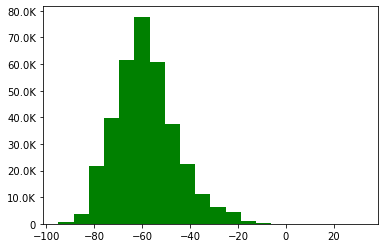

In [11]:
fig, ax = plt.subplots()
hist(ax, df_client_stats_selected_datatype.select('rssi_percs_25'), bins = 20, color=['green'])

(array([45063., 89552., 54424., 12239., 21393., 15723., 26230.,  7594.,
         8165., 10178., 10359.,  8666., 10332., 12502.,   857.,  1345.,
          402.,   653.,   581.,  1400.]),
 array([   0.        ,   65.0000061 ,  130.00001221,  195.00001831,
         260.00002441,  325.00003052,  390.00003662,  455.00004272,
         520.00004883,  585.00005493,  650.00006104,  715.00006714,
         780.00007324,  845.00007935,  910.00008545,  975.00009155,
        1040.00009766, 1105.00010376, 1170.00010986, 1235.00011597,
        1300.00012207]),
 <a list of 20 Patch objects>)

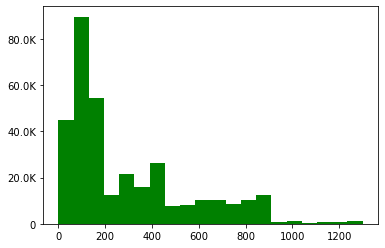

In [12]:
fig, ax = plt.subplots()
hist(ax, df_client_stats_selected_datatype.select('txWeightedPhyRate'), bins = 20, color=['green'])

(array([91478., 68351., 42801., 11028., 21815., 14657., 25507.,  5165.,
         7605., 13732.,  6973.,  7205.,  9362., 16670.,  1029.,   339.,
          173.,   186.,   162.,  1076.]),
 array([   0.        ,   65.00001221,  130.00002441,  195.00003662,
         260.00004883,  325.00006104,  390.00007324,  455.00008545,
         520.00009766,  585.00010986,  650.00012207,  715.00013428,
         780.00014648,  845.00015869,  910.0001709 ,  975.00018311,
        1040.00019531, 1105.00020752, 1170.00021973, 1235.00023193,
        1300.00024414]),
 <a list of 20 Patch objects>)

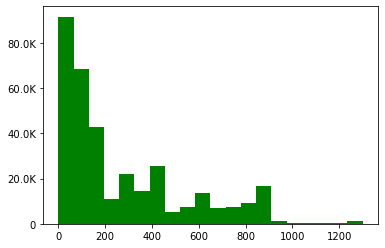

In [13]:
fig, ax = plt.subplots()
hist(ax, df_client_stats_selected_datatype.select('rxWeightedPhyRate'), bins = 20, color=['green'])

# Produce a histogram (graph and CSV) for the average Tx and Rx Weighed Phy Rate between -85 and -65 dB in 1 dB steps 

In [14]:
df_client_stats_selected_range_groupby = df_client_stats_selected_datatype\
                                .filter((f.col('rssi_percs_25') >= -85) & (f.col('rssi_percs_25') <= -65))\
                                .groupby('rssi_percs_25')\
                                .agg(avg('txWeightedPhyRate').alias('txWeightedPhyRate'),
                                avg('rxWeightedPhyRate').alias('rxWeightedPhyRate'))\
                                .sort(desc("rssi_percs_25"))

In [15]:
df_client_stats_selected_range_groupby.show(5)

+-------------+------------------+------------------+
|rssi_percs_25| txWeightedPhyRate| rxWeightedPhyRate|
+-------------+------------------+------------------+
|          -65|220.88181910113045|197.01566539280665|
|          -66|201.99507614852783|175.66188738941918|
|          -67|175.33338901621582|149.40316585973014|
|          -68|160.33300206347946| 132.2090999226467|
|          -69|153.10437781219093|120.87753334797871|
+-------------+------------------+------------------+
only showing top 5 rows



In [16]:
df_client_stats_selected_range_groupby.count()

21

In [17]:
df_client_stats_selected_range_groupby.coalesce(1).write.csv("avg_Tx_Rx_Phyrates_within_rssi_range.csv")

In [18]:
df_client_stats_selected_range_groupby_pd = df_client_stats_selected_range_groupby.toPandas()

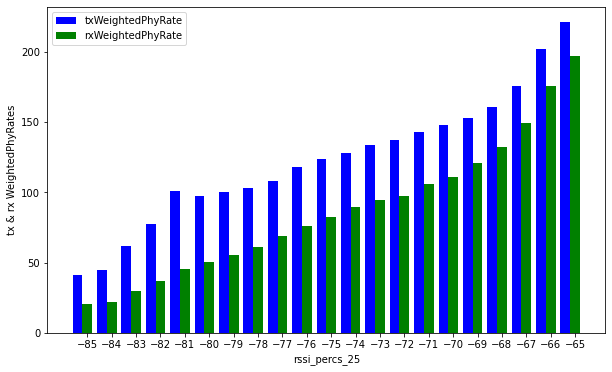

In [19]:
plt.figure(figsize=(10, 6))
ax = plt.subplot(111)
width = 0.4
ax.bar(df_client_stats_selected_range_groupby_pd['rssi_percs_25']-width,df_client_stats_selected_range_groupby_pd['txWeightedPhyRate'],width,color='b',label='txWeightedPhyRate')
ax.bar(df_client_stats_selected_range_groupby_pd['rssi_percs_25'],df_client_stats_selected_range_groupby_pd['rxWeightedPhyRate'],width,color='g',label='rxWeightedPhyRate')
ax.legend()
plt.xlabel('rssi_percs_25')
plt.xticks(np.arange(-85,-64,1))
plt.ylabel('tx & rx WeightedPhyRates')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb1108adeb8>]],
      dtype=object)

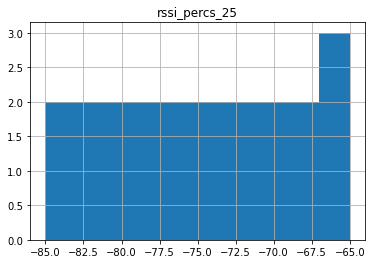

In [20]:
df_client_stats_selected_range_groupby_pd.hist('rssi_percs_25',bins=10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb110702e80>]],
      dtype=object)

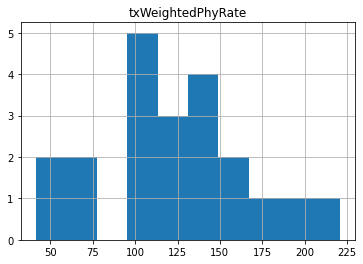

In [21]:
df_client_stats_selected_range_groupby_pd.hist('txWeightedPhyRate',bins=10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb11071b780>]],
      dtype=object)

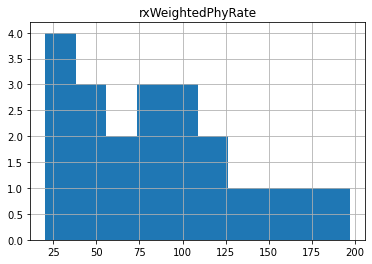

In [22]:
df_client_stats_selected_range_groupby_pd.hist('rxWeightedPhyRate',bins=10)

# Using the client stats sample data provided to you calculate what % of devices are connected to 2.4 GHz and 5 GHz

In [25]:
df_client_stats_2 = spark.read.option("header","true").csv("client_stats_sample_0225part2.csv")

In [26]:
df_client_stats_selected_band = df_client_stats_2.select('mac_address','rssi_percs_25','freq_band')

In [27]:
df_client_stats_selected_band.show(2)

+--------------------+-------------+---------+
|         mac_address|rssi_percs_25|freq_band|
+--------------------+-------------+---------+
|5b969ea8efcc5d3e1...|        -62.0|       5G|
|9cd4189fefcd878d5...|        -37.0|       5G|
+--------------------+-------------+---------+
only showing top 2 rows



In [28]:
df_client_stats_selected_band.select('freq_band').count()

350596

In [29]:
df_plot = df_client_stats_selected_band.groupBy('freq_band').count().toPandas()

In [30]:
df_plot

,freq_band,count
0,2.4G,159914
1,5G,190682


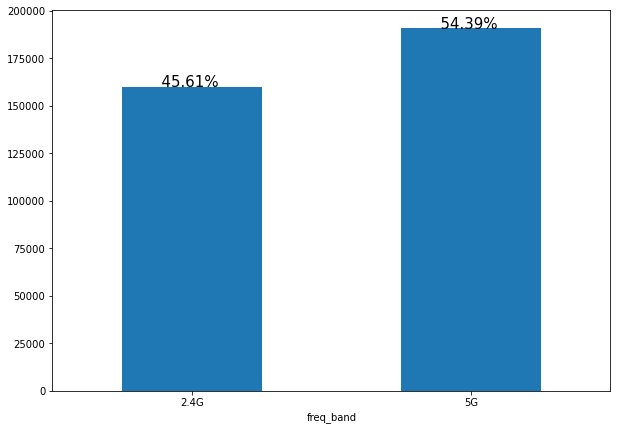

In [31]:
ax = df_plot.plot(kind='bar',x='freq_band', y='count',figsize=(10, 7), rot=0)
ax.legend().set_visible(False)
total = 0
for i in ax.patches:
    total+=i.get_height()

for i in ax.patches:
    ax.text(i.get_x()-.03, i.get_height()+.5, "          "+str(np.around((i.get_height()/total)*100, 2))+'%', fontsize=15)

# Now model the a future hypothetical scenario that could be caused after the new Band Steering feature is activated.  In this future scenario the following four conditions will be met:
Every Device connected to 2.4 GHz with an RSSI >= -60 dB connects to 5 GHz
Every Device connected to 5 GHz with an RSSI <= -75 dB connects to 2.4 GHz
Every Device connected to 5 GHz with an RSSI > -75 dB stays on 5GHz
Every Device connected to 2.4 GHz with an RSSI < -60 dB stays on 2.4GHz

Calculate what % of devices that will be on 2.4GHz and 5GHz using above condition. Will we gain more devices on 5GHz?

In [32]:
### making the records as 'others' which are failed to meet conditions ####
df_client_stats_selected_future_band = df_client_stats_selected_band.withColumn('future_freq_band',f\
                                .when((((f.col('freq_band')=='5G') & (f.col('rssi_percs_25') > -75))|((f.col('freq_band')=='2.4G') & (f.col('rssi_percs_25') >= -60))),'5G')\
                                .when((((f.col('freq_band')=='2.4G') & (f.col('rssi_percs_25') < -60))|((f.col('freq_band')=='5G') & (f.col('rssi_percs_25') <= -75))),'2.4G')\
                                .otherwise('others'))

In [33]:
# df_client_stats_selected_future_band_filter = df_client_stats_selected_future_band.filter(df_client_stats_selected_future_band.future_band.isNotNull())

In [34]:
df_client_stats_selected_future_band_pd = df_client_stats_selected_future_band.groupBy('future_freq_band').count().toPandas()

In [35]:
df_client_stats_selected_future_band_pd

,future_freq_band,count
0,others,305
1,2.4G,105754
2,5G,244537


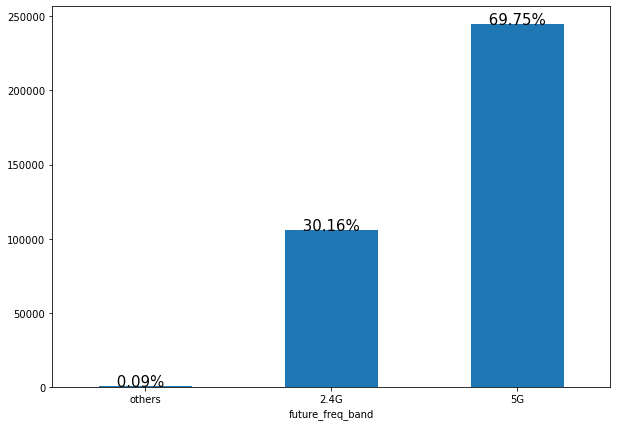

In [36]:
ax = df_client_stats_selected_future_band_pd.plot(kind='bar',x='future_freq_band', y='count',figsize=(10, 7), rot=0)
total = 0
ax.legend().set_visible(False)
for i in ax.patches:
    total+=i.get_height()

for i in ax.patches:
    ax.text(i.get_x()-.03, i.get_height()+.5, '     '+str(np.around((i.get_height()/total)*100, 2))+'%', fontsize=15)